# Write a Python Program for Global Thresholding

In [2]:
from ctypes import c_int32
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
!wget -O livingroom.tif "https://drive.google.com/uc?export=download&id=152bXetIYM2kD5p_q_D3Mh0QAK_Xp8Hx-"

--2024-04-30 01:14:46--  https://drive.google.com/uc?export=download&id=152bXetIYM2kD5p_q_D3Mh0QAK_Xp8Hx-
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving drive.google.com (drive.google.com)... 142.250.182.238, 2404:6800:4009:81f::200e
Connecting to drive.google.com (drive.google.com)|142.250.182.238|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=152bXetIYM2kD5p_q_D3Mh0QAK_Xp8Hx-&export=download [following]
--2024-04-30 01:14:47--  https://drive.usercontent.google.com/download?id=152bXetIYM2kD5p_q_D3Mh0QAK_Xp8Hx-&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.27.193, 2404:6800:4009:800::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.27.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262750 (257K) [application/octet-stream]
Saving to: ‘livingroom.tif’

livingroom.ti

In [3]:
image=Image.open('livingroom.tif')
image=image.convert("L")

In [4]:
def my_global(a):
    plt.figure(figsize=(5,5))
    plt.subplot(2,1,1)
    y=plt.hist(a.flatten(),256,[0,256],linewidth=1.0)
    m,n=a.shape
    div=int((m*n))/2
    sum=0
    T=0
    for i in range(len(y[0])):
        sum=sum+y[0][i]
        if(sum>div):
            T=i
            break;
    T=np.uint8(input("Enter the threshold: "))
    print("Threshold = ",T)
    r,c=a.shape
    GT=np.zeros((r,c))
    sum1=0
    sum2=0
    c1=0
    c2=0
    for i in range(r): #ROW
        for j in range(c): #COLUMN
            if(a[i,j]>=T):
                sum1=sum1+a[i,j]
                c1=c1+1
            else:
                sum2=sum2+a[i,j]
                c2=c2+1
    avg1=sum1/c1
    avg2=sum2/c2
    T_new=(avg1+avg2)/2
    print("Improved threshold = ",T_new)
    for i in range(r):
        for j in range(c):
            if(a[i,j]>=T_new):
                GT[i,j]=255
            else:
                GT[i,j]=0

    return GT

Threshold =  145
Improved threshold =  134.76238072108669


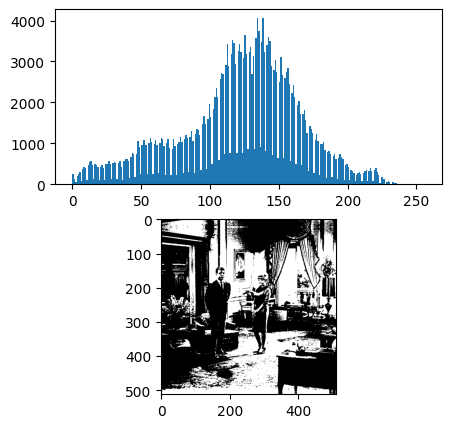

In [5]:
a=np.array(image)
thresh=my_global(a)
plt.subplot(2,1,2)
plt.imshow(thresh,cmap='gray') #SHOWING OUTPUT IMAGE